In [1]:
import subprocess as subp
import matplotlib.pyplot as plt
import numpy as np
import json
import time

In [2]:
concurrent_clients_tests = [1, 5, 10, 20, 40, 80]

In [3]:
address = "localhost"
port = "8005"

In [4]:
# TCP Server
subp.Popen(["go", "run", "./Atividade_3/tcp/tcpServer.go", port], stdout=subp.DEVNULL)

# UDP Server
subp.Popen(["go", "run", "./Atividade_3/udp/udpServer.go", port], stdout=subp.DEVNULL)

In [7]:
for client_num in concurrent_clients_tests:
   print(f"Now testing for {client_num} concurrent clients.")

   # TCP Clients
   for i in range(client_num-1):
      subp.Popen(["go", "run", "./Atividade_3/tcp/tcpServer.go", f"{address}:{port}", "false"],
      stdout=subp.DEVNULL
   )
   # Last client needs to measure time RTT and return it as a mean of durations.
   current_client_num_rtt = subp.check_call(
      ["go", "run", "./Atividade_3/tcp/tcpClient.go", f"{address}:{port}", "true", f"./Atividade_3/tcp/{json_file_name}"],
      stdout=subp.DEVNULL
   )

Now testing for 1 concurrent clients.
The data for this tests will be stored in test_1.json
Now testing for 5 concurrent clients.
The data for this tests will be stored in test_5.json
Now testing for 10 concurrent clients.
The data for this tests will be stored in test_10.json
Now testing for 20 concurrent clients.
The data for this tests will be stored in test_20.json
Now testing for 40 concurrent clients.
The data for this tests will be stored in test_40.json
Now testing for 80 concurrent clients.
The data for this tests will be stored in test_80.json


In [8]:
for client_num in concurrent_clients_tests:
   print(f"Now testing for {client_num} concurrent clients.")

   # UDP Clients
   for i in range(client_num-1):
      subp.Popen(["go", "run", "./Atividade_3/udp/udpClient.go", f"{address}:{port}", "false"],
      stdout=subp.DEVNULL
   )
   # Last client needs to measure time RTT and return it as a mean of durations.
   current_client_num_rtt = subp.check_call(
      ["go", "run", "./Atividade_3/udp/udpClient.go", f"{address}:{port}", "true", f"./Atividade_3/udp/{json_file_name}"],
      stdout=subp.DEVNULL
   )

Now testing for 1 concurrent clients.
The data for this tests will be stored in test_1.json
Now testing for 5 concurrent clients.
The data for this tests will be stored in test_5.json
Now testing for 10 concurrent clients.
The data for this tests will be stored in test_10.json
Now testing for 20 concurrent clients.
The data for this tests will be stored in test_20.json
Now testing for 40 concurrent clients.
The data for this tests will be stored in test_40.json
Now testing for 80 concurrent clients.
The data for this tests will be stored in test_80.json


In [24]:
file_names = [
    "test_1.json", "test_5.json", "test_10.json",
    "test_20.json", "test_40.json", "test_80.json",
]

concurrent_clients_tcp_rtt = []
concurrent_clients_udp_rtt = []

In [25]:
for file_name in file_names:
    json_file = open(f"./Atividade_3/tcp/{file_name}", 'r')
    tcp_rtts = json.load(json_file)
    json_file.close()

    json_file = open(f"./Atividade_3/udp/{file_name}", 'r')
    udp_rtts = json.load(json_file)
    json_file.close()

    mean_tcp_rtt = round((sum(tcp_rtts) / len(tcp_rtts)) / 10000, 2)
    mean_udp_rtt = round((sum(udp_rtts) / len(udp_rtts)) / 10000, 2)

    concurrent_clients_tcp_rtt.append(mean_tcp_rtt)
    concurrent_clients_udp_rtt.append(mean_udp_rtt)

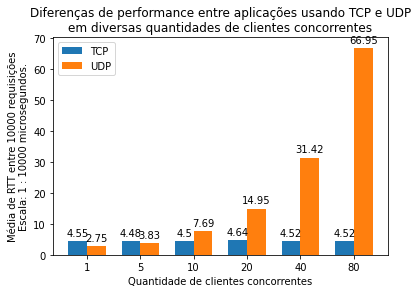

In [29]:
x = np.arange(len(concurrent_clients_tests))  # the label locations
width = 0.35  # the width of the bars
  
tcp_bar = plt.bar(x - width/2, concurrent_clients_tcp_rtt, width, label = 'TCP')
udp_bar = plt.bar(x + width/2, concurrent_clients_udp_rtt, width, label = 'UDP')

plt.xticks(x, concurrent_clients_tests)
plt.xlabel("Quantidade de clientes concorrentes")
plt.ylabel("Média de RTT entre 10000 requisições\nEscala: 1 : 10000 microsegundos.")
plt.title("Diferenças de performance entre aplicações usando TCP e UDP\nem diversas quantidades de clientes concorrentes")
plt.legend()

plt.bar_label(tcp_bar, padding=3)
plt.bar_label(udp_bar, padding=3)

plt.savefig("./graphs.png")
plt.show()